# 6.5 Lab: Subset Selection Methods

## 6.5.1 Best Subset Selection

In [1]:
# load packages
library(ISLR)

In [2]:
# load the hitters data set and check the dimension and variable names
data(Hitters)
hitters = Hitters
dim(hitters)
names(hitters)

[1] 322  20

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [3]:
# check for missing values
sum(is.na(hitters))

[1] 59

In [4]:
# remove the missing values and check the dimension again and missing values again
hitters = na.omit(hitters)
dim(hitters)
sum(is.na(hitters))

[1] 263  20

[1] 0

In [5]:
# load the leaps library which is available in conda's r channel
# see the instructions in install-instructions/README.md
library(leaps)

# consider models with up to 19 (all) variables, run all subsets of variables
# find the best model for every number of variables
reg_fit_full = regsubsets(Salary ~ ., data=hitters, nvmax=19)
reg_summary = summary(reg_fit_full)
reg_summary

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = hitters, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"

In [6]:
# see the attributes of reg_summary
names(reg_summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [7]:
# see the R-squared for the best model with idx variables
reg_summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

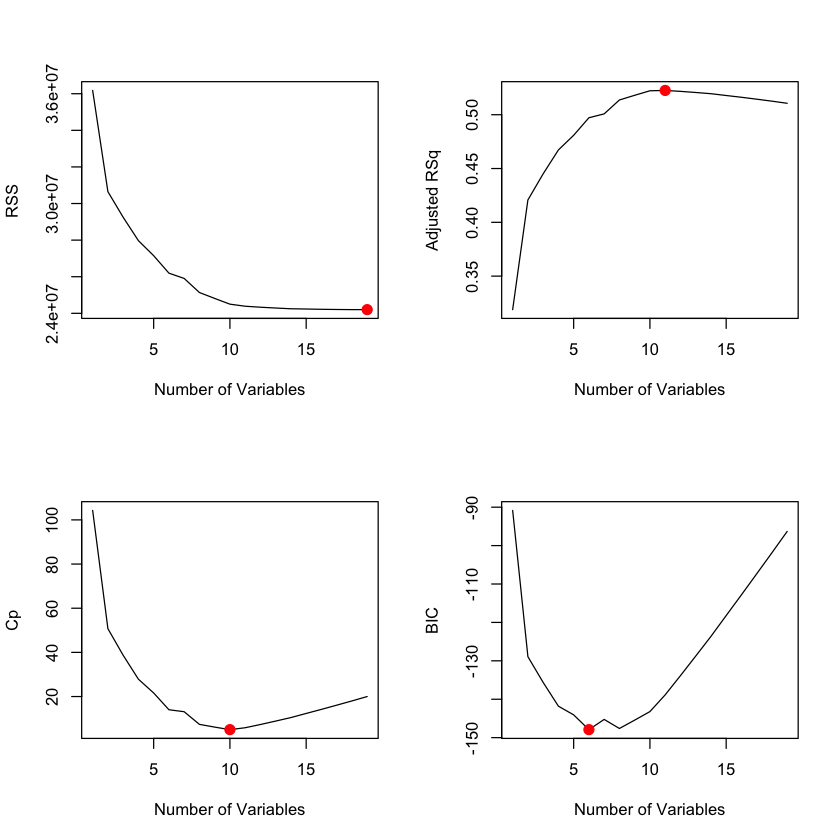

In [8]:
# plot number of variables for the best model against the associated RSS, Adjusted R-Squared, Cp and BIC. 
par(mfrow=c(2, 2))

plot(reg_summary$rss, xlab="Number of Variables", ylab="RSS", type="l")
points(
    which.min(reg_summary$rss),
    min(reg_summary$rss),
    col="red",
    cex=2,
    pch=20
)

plot(reg_summary$adjr2, xlab="Number of Variables", ylab="Adjusted RSq", type="l")
points(
    which.max(reg_summary$adjr2),
    max(reg_summary$adjr2),
    col="red",
    cex=2,
    pch=20
)

plot(reg_summary$cp, xlab="Number of Variables", ylab="Cp", type="l")
points(
    which.min(reg_summary$cp),
    min(reg_summary$cp),
    col="red",
    cex=2,
    pch=20
)

plot(reg_summary$bic, xlab="Number of Variables", ylab="BIC", type="l")
points(
    which.min(reg_summary$bic),
    min(reg_summary$bic),
    col="red",
    cex=2,
    pch=20
)

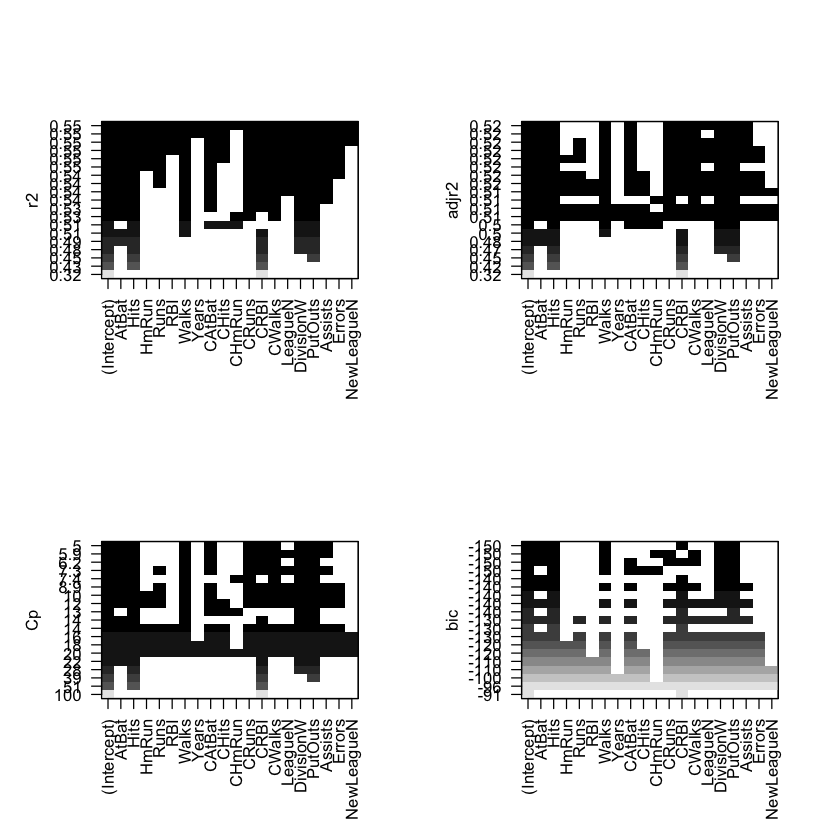

In [9]:
# use the built-in plot function to plot the best models against their associated fit metrics
par(mfrow = c(2,2))
plot(reg_fit_full, scale="r2")
plot(reg_fit_full, scale="adjr2")
plot(reg_fit_full, scale="Cp")
plot(reg_fit_full, scale="bic")

In [10]:
# check which number of regressors minimizes BIC
which.min(reg_summary$bic)

[1] 6

In [11]:
# get the coefficients of the best model with 6 variables
coef(reg_fit_full, 6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

## 6.5.2 Forward and Backward Stepwise Selection

In [12]:
# select using forward selection
reg_fit_fwd = regsubsets(Salary ~ ., data=hitters, nvmax=19, method="forward")
summary(reg_fit_fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [13]:
# select using backward selection
reg_fit_bwd = regsubsets(Salary ~ ., data=hitters, nvmax=19, method="backward")
summary(reg_fit_bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


In [14]:
# show the resulting model with 7 variables resulting from each type of selection
coef(reg_fit_full, 7)
coef(reg_fit_fwd, 7)
coef(reg_fit_bwd, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847